# VGG16 Retrain using custom layers

### Imports

In [138]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import backend as k
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import cv2, numpy as np
import matplotlib.pyplot as plt
import itertools
import os
from sklearn.metrics import confusion_matrix

### Setup Trainer

In [115]:
train_data_dir = "memes"
validation_data_dir = "memes_val"
test_data_dir = "memes_test"
nb_train_samples = 1313
nb_validation_samples = 454
batch_size = 16
epochs = 50

In [116]:
# plot images with labels
def plots(imgs, figsize=(12,6), rows=2, interp=False, titles=None):
    if type(imgs[0]) is np.ndarray:
        imgs = np.array(imgs).astype(np.uint8)
        if (imgs.shape[-1]!=3):
            imgs = imgs.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(imgs)//rows if len(imgs)%2 == 0 else len(imgs)//rows+1
    for i in range(len(imgs)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=14)
        plt.imshow(imgs[i], interpolation=None if interp else 'none')

### Look at some Memes!

In [140]:
train_batches = ImageDataGenerator().flow_from_directory(train_data_dir, target_size=(224,224), batch_size=4)
valid_batches = ImageDataGenerator().flow_from_directory(validation_data_dir, target_size=(224,224), batch_size=2)
test_batches = ImageDataGenerator().flow_from_directory(test_data_dir, target_size=(224,224), batch_size=2)

Found 1313 images belonging to 18 classes.
Found 454 images belonging to 18 classes.
Found 454 images belonging to 18 classes.


In [118]:
for (dirpath, dirnames, filenames) in os.walk('memes'):
    print(dirnames)
    meme_labels = dirnames
    break

['Art Classical', 'Blacman Feels', 'Cartoons', 'Comics Original', 'Cool Stuff IRL', 'Doggo n Kitty', 'Drake', 'Escalating', 'FBI SMS', 'Forums', 'Modern Whos Whens', 'Stills Movies', 'Stock', 'Texts', 'Twitter FB Forums', 'Versus', 'Web is Crazy', 'World']


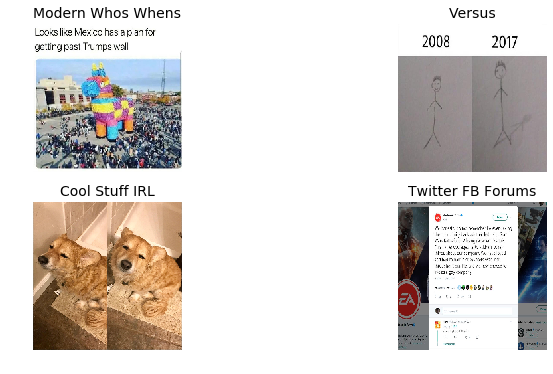

In [124]:
imgs, labels = next(train_batches)
c = []
for l in labels:
    for i in range(len(l)):
        if l[i]>0:
            c.append(meme_labels[i])
plots(imgs, titles=c)

### Build VGG16 Model

In [121]:
model = Sequential([
    Convolution2D(32,(3,3),activation='relu',input_shape=(224,224,3)),
    Flatten(),
    Dense(18,activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_2 (Dense)              (None, 18)                28387602  
Total params: 28,388,498
Trainable params: 28,388,498
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [123]:
model.fit_generator(train_batches, steps_per_epoch=65,validation_data=valid_batches, validation_steps=20, epochs=5,verbose=1)
#print('whhaaaaaaaaat')

Epoch 1/5
65/65 [==============================] - 11s 173ms/step - loss: 14.5688 - acc: 0.0962 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
65/65 [==============================] - 9s 143ms/step - loss: 14.8782 - acc: 0.0769 - val_loss: 14.1839 - val_acc: 0.1200
Epoch 3/5
65/65 [==============================] - 9s 141ms/step - loss: 14.8782 - acc: 0.0769 - val_loss: 15.3122 - val_acc: 0.0500
Epoch 4/5
65/65 [==============================] - 9s 142ms/step - loss: 14.3203 - acc: 0.1115 - val_loss: 14.9898 - val_acc: 0.0700
Epoch 5/5
65/65 [==============================] - 9s 142ms/step - loss: 15.1882 - acc: 0.0577 - val_loss: 15.1412 - val_acc: 0.0606


### Testing

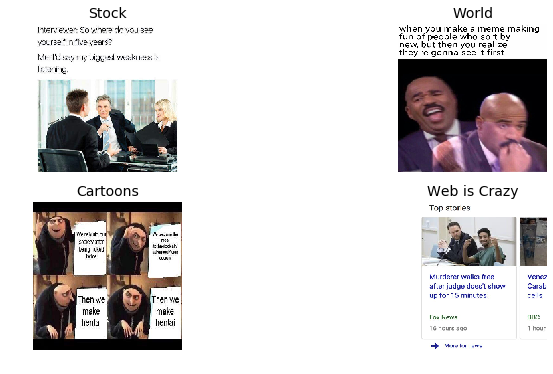

In [127]:
test_imgs, test_labels = next(test_batches)
d = []
for l in test_labels:
    for i in range(len(l)):
        if l[i]>0:
            d.append(meme_labels[i])
plots(test_imgs, titles=d)

In [136]:
predictions = model.predict_generator(test_batches, steps=20, verbose=1)
e = []
for l in predictions:
    for i in range(len(l)):
        if l[i]>0:
            e.append(meme_labels[i])
print(e)

20/20 [==============================] - 1s 31ms/step
['Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 'Twitter FB Forums', 

In [139]:
cm = confusion_matrix(d, e)

ValueError: Found input variables with inconsistent numbers of samples: [4, 80]